# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [101]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [102]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


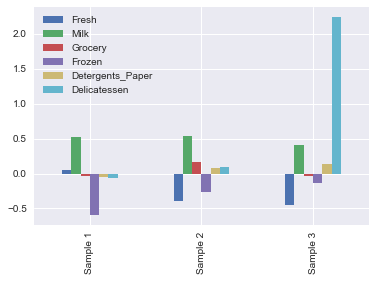

In [103]:
# Select three indices of your choice you wish to sample from the dataset
indices = [0,1,2]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# from the first review, it was suggested that normalizing the samples
# would make it easier to reason about the relationships
# this graph is from that review
import seaborn as sns

samples_for_plot = samples.copy()
samples_for_plot = (samples_for_plot - data.mean())/data.std()

labels = ['Sample 1','Sample 2','Sample 3']
samples_for_plot.plot(kind='bar')
_ = plt.xticks(range(3),labels)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

types of establishment:
   - high volume   (supermarket, Walmart, Amazon)
   - cafe          (discrete restaurant, not in other type of store)
   - specialty     (small shop, bakery, butcher, produce etc)
   - convenience   (7-11 type)

<pre>
                       ~mean cost   high-volume    cafe    specialty    convenience   
    Fresh                high           1            1         1              0        
    Milk                 high           1            0         0              1        
    Grocery              high           1            0         1              1        
    Frozen               low            1            0         0              1        
    Detergents_Paper     low            1            0         0              0        
    Delicatessen         low            1            1         1              0?       
</pre>

- 1 indicates probably yes, 0 indicates probably no. 
- Items with question mark indicate 'maybe' or 'not sure'.

After thinking it through a bit, I see really two categories of establishment: high volume and specialty. High volume would be supermarket and online. Specialty are the others. I expect that high volume establishments 

I looked at the mean cost of each purchase category. If the mean is high, then I assume either several types of establishment sell the product, or it is sold in higher volume establishments (supermarket). However, for a couple of the items, Milk and Detergents_Paper I assume it is only makes sense for specific establishment types regardless of cost. I arbitrariliy divided mean cost into high (>5000) and low (<= 5000). 

In the U.S., there is a bit of crossover between general retailers and specialty vendors. Supermarkets and convenience stores often have delis or cafes. Since the dataset was developed in Portugal it will interesting to see if that assumption applies. I expect it does.



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [104]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# which feature to drop
drop_feature = "Delicatessen"

# labels
y = data[drop_feature]

# features minus dropped value
new_data = data.drop(drop_feature, axis=1)

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=.20) # , random_state=42)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)

# fit the model
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print(score)

-0.404902765898


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Score for this run: -10.7962538518

I selected Delicatessen based on intuition that it would not correlate with the other types of product. <p style="text-decoration: line-through">The negative R^2 score indicates that it is not relevant to predicting spending habits. 
</p>

The first review pointed out that I totally misunderstood the result from this test. The negative R^2 score actually indicates that after removing the Delicatessen feature, the remaining data could not predict that label. After rethinking what is going on, I think I understand that the features and labels are just values, not things. So in this case the decision tree with the remaining feature values could not come up with a correlation to the Delicatessen value. This means that the removed feature is relevant to clustering the final results properly. 


I found that if I did not set a random_state for the test_train_split I would get different scores for each run of the test. I checked this by running the test on each label type. They all exhibited the same variability in results, although the scores tended to be similar. To further check I ran cross_val_score for each label type and again the results of the cross validation differed some, although for each label in the cross validation there was a trend to the values. "Delicatessen" was always negative, with differing magnitudes.

I plotted the learning_curve results for this data and it shows overfitting (training score is high, cv score falls with number of training examples), which agrees with the variability in results based on different results from test_train_split. I attempted to fix this by varying the parameters for the DecisionTreeRegressor but I could not fix it.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

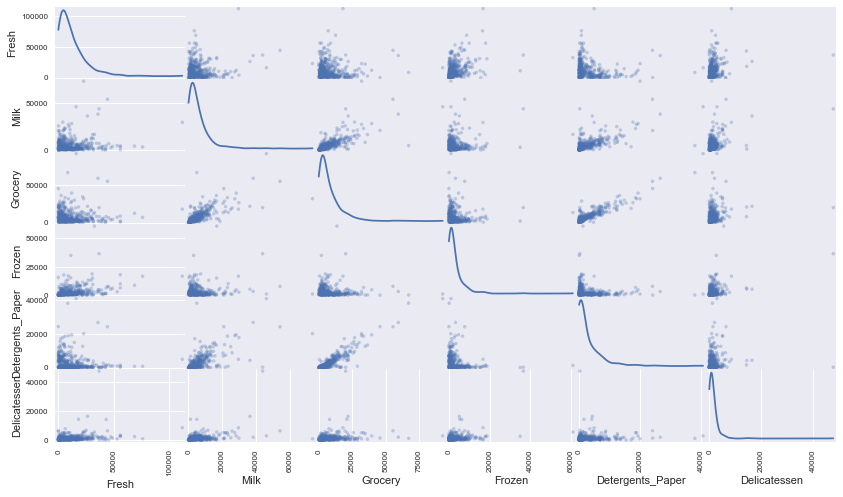

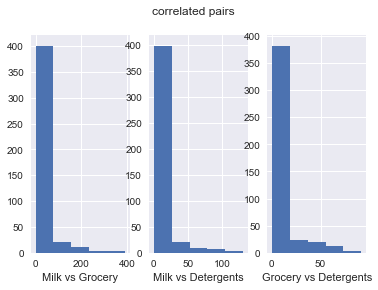

In [105]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# plot distribution of the 3 correlated pairs

# create the frequency 
def make_hist(x,y):
    d = 440
    cy = np.zeros(d)
    for i in range(d):
        xx = x[i] / d
        yy = y[i] / d
        cy[xx] = cy[xx] + yy
    return cy
    
fig,(ax0,ax1,ax2) = plt.subplots(ncols=3)
fig.suptitle('correlated pairs')
ax0.hist(make_hist(data['Milk'],data['Grocery']),bins=5)
ax0.set_xlabel('Milk vs Grocery')
ax1.hist(make_hist(data['Milk'],data['Detergents_Paper']),bins=5)
ax1.set_xlabel('Milk vs Detergents')
ax2.hist(make_hist(data['Grocery'],data['Detergents_Paper']),bins=5)
ax2.set_xlabel('Grocery vs Detergents')
plt.show()


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The least correlated features is Delicatessen. Its plots vary only by the value of Delicatessen. Its distribution is random relative to the other features.

Pairs of features that show a strong correlation (distribution is skewed right, positive)

    - Milk, Grocery
    - Milk, Detergent_Paper
    - Grocery,Detergents_Paper

Some of the other feature pairs also have a concave shape with data close to the X and Y axes, indicating a negative correlation . For example, Detergents_Paper vs Fresh indicates if more Detergents_Paper are purchased, less Fress is, and vice versa.
     
<p style="text-decoration: line-through">My guess that Delicatessen was not relevant is confirmed by the plot. Delicatessen values are close to 0 for all other labels, minus a few outliers. <p>

Delicatessen does not correlate with other features. This indicates it IS important to the final clustering, not that it isn't. My understanding now is that in an extreme case, a non-correlating feature could generate a cluster of its own if the other features were evenly distributed. In this less extreme case, Delicatessen will be an important feature for the final clustering.




## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

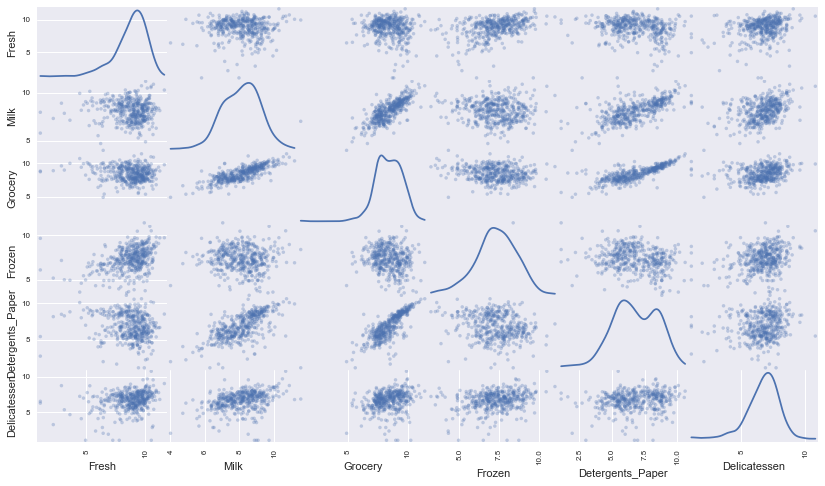

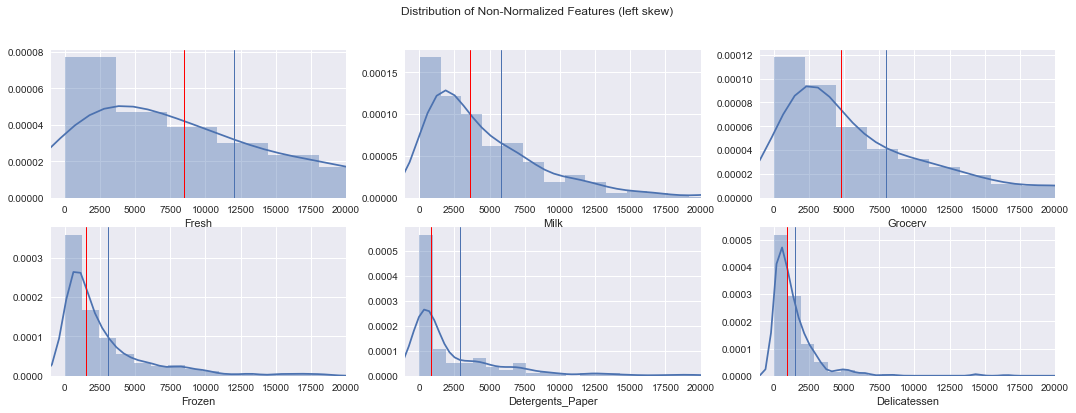

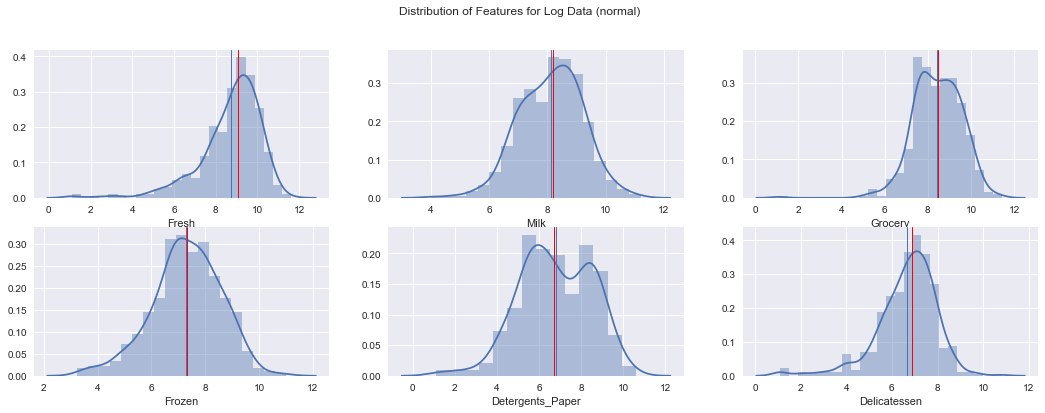

In [106]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Suggested plots from first review, that compare distributions before and after normalization
# NOT MY CODE
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Non-Normalized Features (left skew)')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')
    
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data (normal)')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')    

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [107]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [108]:
log_data = np.log(data)
log_samples = np.log(samples)

total_outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # get outliner indices for this feature
    ol = log_data.index[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    # accumlate the total outliers
    [total_outliers.append(i) for i in ol]
            
#  determine duplicate outliers
duplicate_outliers = []
total_outliers.sort()
for i in range(1,len(total_outliers)):
    if total_outliers[i-1] == total_outliers[i]:
        duplicate_outliers.append(total_outliers[i])
# print(duplicate_outliers)

# remove duplicates
unique_outliers = np.unique(total_outliers)

# use all outliers
outliers = unique_outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
all_data  = log_data.drop([]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Duplicate outliers for more than one feature are 65(2), 66(2), 75(2), 128(2), 154(3). This indicates that for these indices, there was a large purchase of 2 or more items. Such a large purchase of a couple of items could skew the other features, so yes these should be removed.

There were 42 unique outliers from the entire dataset. With 440 total data points, removing all these potential outliers reduces the dataset by 10%. That's not a whole lot, but it could eliminate some data points that are relevant. However, in this case my decision is that this amount is small enough to remove all the identified outliers. This includes the duplicated outliers.




## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

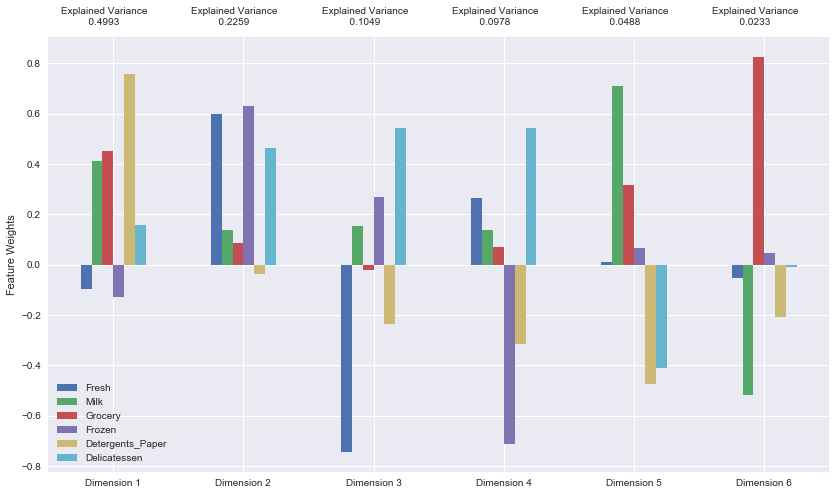

In [109]:
from sklearn.decomposition import PCA

# Plot with removal of outliers
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=42)

pca.fit_transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

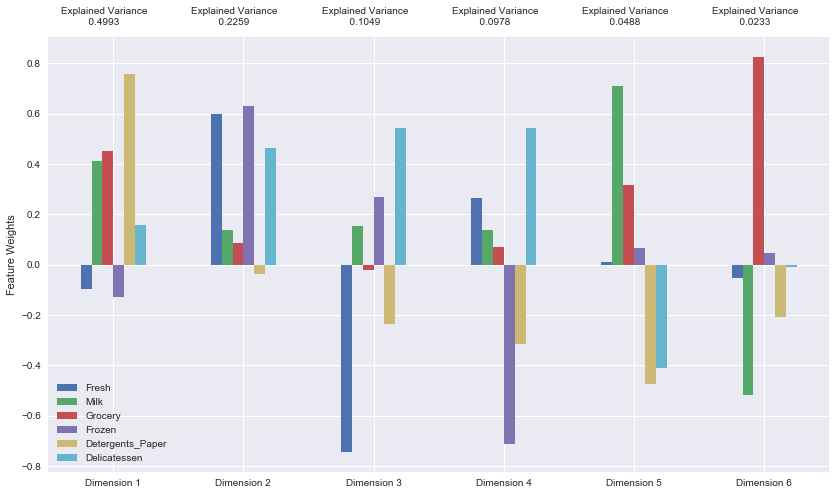

In [110]:
from sklearn.decomposition import PCA

# Plot with outliers included
# Apply PCA by fitting the good data with the same number of dimensions as features
pca2 = PCA(random_state=42)

pca2.fit_transform(all_data)

# Transform log_samples using the PCA fit above
pca2_samples = pca2.transform(log_samples)

# Generate PCA results plot
pca2_results = vs.pca_results(all_data, pca)

The first review suggested plotting the PCA results with outliers included. This completely changes the results. It appears that including the outliers misrepresents the overall trends. The outliers greatly increase the variance of the affected features which adversely affects the PCA results.

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
<pre>
component 1 variance  = 0.4993
component 2 variance  = 0.2259
component 3 variance  = 0.1049
component 4 variance  = 0.0978

total for 1 and 2     = 0.7252
total for 1,2,3 and 4 = 0.9279
</pre>

* first component   : indicates  Milk Grocery and Detergent_Paper are purchased in similar quantities, proportionally. That is, when more Groceries are purchased, more Milk and Detergents_Paper are purchased. There is not much influence by Deli, Fresh and Frozen items in this group
* second component : indicates that Fresh and Frozen items are purchased proportionally along with Deli items. 
* third component  : indicates Fresh and Delicatessen items are purchased proportionally ,with a bit of Detergents_Paper also
* fourth component : indicates Frozen and Delicatessen items are purchased proportionally, with a bit of Detergents_Paper also 

From the results, a guess as to what establishments there are would be just 2, supermarkets (1&2) and delis in a convenience store (3&4)



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [111]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7793,-0.6604,-0.8247,1.6580,0.0903,-0.4808
1,1.8820,0.4617,0.2764,0.1055,0.0958,-0.2093
2,1.9935,1.2471,1.2157,0.6134,-0.6732,-0.3420


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [112]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=42)

# Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [113]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7793,-0.6604
1,1.8820,0.4617
2,1.9935,1.2471


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

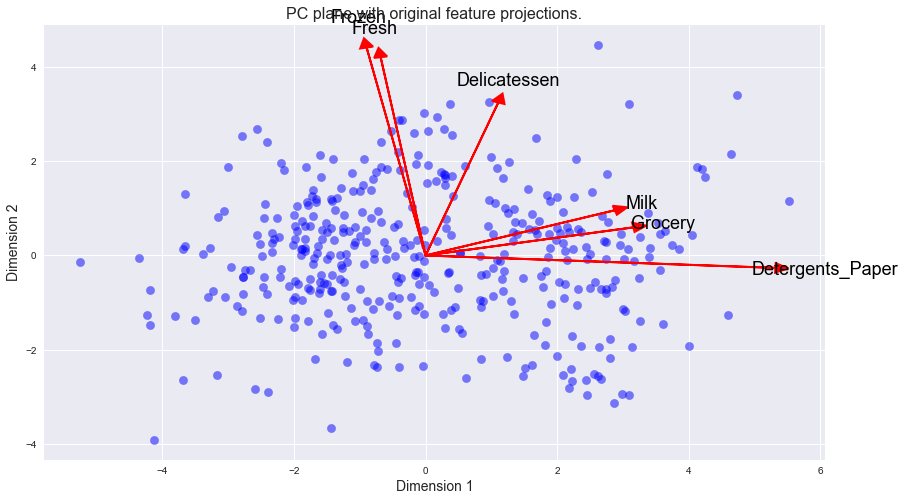

In [114]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
It appears there is no obvious separation of clusters. The data looks kind of evenly distributed around the [0,0]. (Different distribution horizontal vs vertical). I can imagine a slightly tilted vertical line at about x = 0.4 that divides the data into 2 clusters. 

K-Means clusters the data points without assuming a particular distribution, whereas Gaussian Mixture assumes that the data is a combination of measurements that are each Gaussian. 

K-Means assigns samples to clusters explicitly. Gaussian Mixture assigns probabilities to the samples so that it would reveal any overlap at the boundaries of clusters, if that was important.

However the exercise below is just using the basic clustering so in this case the assignment to clusters and the silhouette score is all that is seen, so any advantage of Gaussian Mixture isn't seen, if there is one. From reading I find a few papers that indicate K-Means is more accurate for this purpose. In this case I think the two variations should be tested for accuracy and compute time, then make a determination based on those results.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

clusterer = GaussianMixture(n_components=2,random_state=42)

clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

print(score)

0.447411995571


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
<pre>
n_clusters       KMeans                     Gaussian Mixture
    2            0.447157742293             0.447411995571
    3            0.364874035612             0.359307375896
    4            0.331150954285             0.30497894189
    5            0.350794538773             0.313056565177
</pre>


I tested both K-Means and Gaussian Mixture to compare the results. The best silhouette score is for 2 clusters using Gaussian Mixture. But the results are extremely close (0.0003) and varying the random_state for the cluster object changes the results. So for this data set it doesn't matter too much. That must mean that the data is easily separable and that the features are at least somewhat gaussian.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

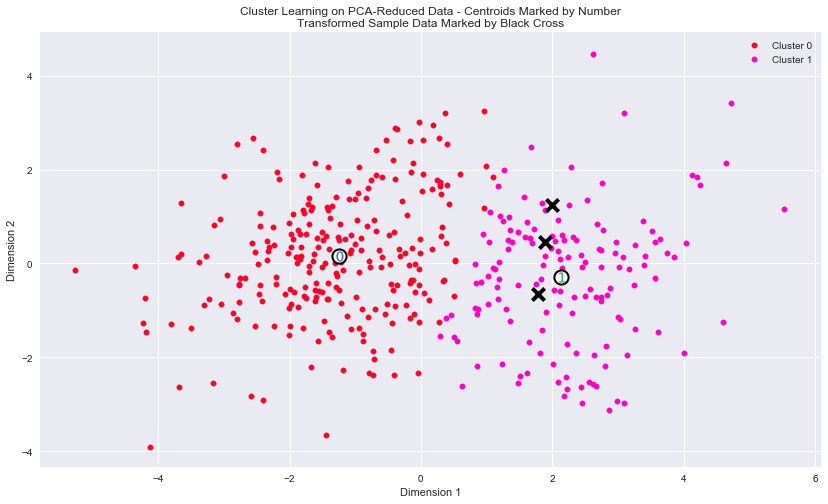

In [116]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

# NOTE : the plots for K-Means and Gaussian Mixture with 2 components were very similar. A few points at the boundaries differed.

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [117]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9468.0,2067.0,2624.0,2196.0,343.0,799.0
Segment 1,5174.0,7776.0,11581.0,1068.0,4536.0,1101.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 1 has larger expenditures for all items. This segment would fit a high volume establishment such as a supermarket. However the low relative amount for Frozen is counterintuitive for a supermarket. Even Delicatessen is higher than frozen for this segment. So it's not clear what that means. That leaves Segment 0 as lower volume establishments, which would include cafes, restaurants, convenience stores and specialy markets. Of those only convenience stores would have Detergents_Paper. The remaining items in Segment 0 indicate cafes and restaurants.


The cluster plot shows that the distribution of Segment 0 is primarily to the left of the mean of Dimension 1, whereas Segment 1 is to the right of the mean. The data in both segments is evenly distributed around the mean of Dimension 2.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [118]:
# redisplay the original samples for comparison so i don't have to scroll to the top
display(samples)
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**
Samples 1 and 2 fit well with the predictions. They both have higher proporations of Milk, Grocery and Detergents_Paper, indicating a high volume establishment such as a supermarket. Sample 0 doesn't fit as well, due to its high proportion of Fresh relative to the other categories, which did match the expectation for a supermarket. It is probably on the edge between Segment 0 and Segment 1 where the categories besides Fresh pushed it over the edge to Segment 1.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The A/B test could be divided into 2 groups to start. Group 1 would be all customers from Segment 0 and Group 2 would be all customers from Segment 1. Then each of these groups is divided into a control and test group.

The Segment 0 group would be divided (equally or in some proporation) into a control group and a test group. The control group would continue with the 5 day schedule, and the test group would be changed to the 3 day schedule.

The Segment 1 group would be divided (equally or in some proporation) into a control group and a test group. The control group would continue with the 5 day schedule, and the test group would be changed to the 3 day schedule.

After a specified test period, a survey with appropriate questions regarding delivery schedule vs satisfaction would be given to all 4 groups. The results for Segment 0 control and test would be compared with each other, and likewise for the Segment 1 control and test. 

The comparisons would suggest which schedule worked better, worse or no difference for the two major groups.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
The hint pretty much gives it away. First, run the unsupervised classification and capture the resulting segment assignment for each customer. Then create a supervised learner that uses the original data as the features and the assigned segments as the labels for training. Then that learner could be used to predict the new customers based on their estimates of the features.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

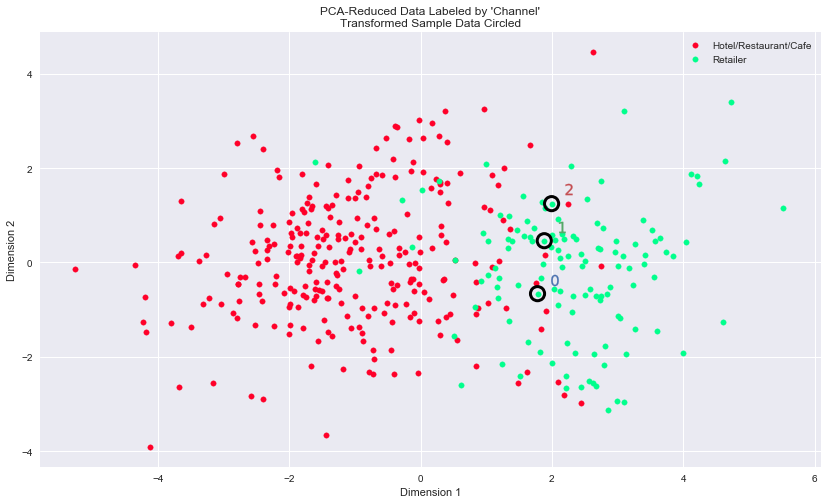

In [119]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The clusters I arrived at closely match the results in this chart, with some exceptions where some original data points fall are not in the computed cluster. 

Given the distribution, it does appear that some of the segments could be classified as 'pure'. Points to the far right in the chart coule be pure Retailers, where points to the far left could be pure Hotel/Restaurant/Cafe. The ones in the middle could go either way. That indicates that using a Gaussian Mixture where the proportion of overlap is computed may be more helpful then KMeans. Or, perhaps 3 clusters would give a better picture of the  mixed area around Dimension 1 == 1 would be captured. Then the wholesaler might be able to start new customers on the far right with a 3 day schedule, ones on the far left with the 5 day schedule, and then work with the establishments in the middle to figure out which schedule they prefer.

The classifications in the data do match my previous definition, where I used supermarket/high volume vs restaurant/cafe/low volume as the definitions. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.